In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
#plt.switch_backend("TkAgg")
#sudo yum install tcl tcl-devel tk tk-devel agg agg-devel
#sudo apt-get install tk-dev libpng-dev libffi-dev dvipng texlive-latex-base
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error


In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [5]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [8]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [9]:
# An example data point
print(X_train[2])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232
  39   0   0   0   0   0   0   0   0   0  62  81   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0   0   0
   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2
 153 210  40   0   0   0   0   0   0   0   0   0 220 163   0   0   0   0
   0   0   0   0   0   0   0   0   0  27 254 162   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [11]:
# example data point after normlizing
print(X_train[2])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
# here we are having a class number for each image
print("Class label of first image :", y_train[2])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[2])

Class label of first image : 4
After converting the output into a vector :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [15]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 38us/step - loss: 1.2476 - acc: 0.7168 - val_loss: 0.7993 - val_acc: 0.8362
Epoch 2/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.7070 - acc: 0.8451 - val_loss: 0.6022 - val_acc: 0.8634
Epoch 3/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.5823 - acc: 0.8607 - val_loss: 0.5227 - val_acc: 0.8749
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.5221 - acc: 0.8703 - val_loss: 0.4779 - val_acc: 0.8828
Epoch 5/20
60000/60000 [==============================] - 2s 27us/step - loss: 0.4854 - acc: 0.8760 - val_loss: 0.4487 - val_acc: 0.8871
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.4601 - acc: 0.8811 - val_loss: 0.4281 - val_acc: 0.8907
Epoch 7/20
60000/60000 [==============================] - 2s 26us/step - loss: 0

Test score: 0.3362338714301586
Test accuracy: 0.9084


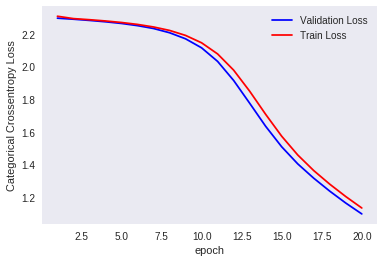

In [24]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

MLP + Sigmoid activation + SGDOptimizer


In [51]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(64, activation='sigmoid'))

model_sigmoid.add(Dropout(0.75))

model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_35 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                650       
Total params: 476,490
Trainable params: 476,490
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 125us/step - loss: 2.5814 - acc: 0.1010 - val_loss: 2.2982 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 6s 100us/step - loss: 2.3759 - acc: 0.1011 - val_loss: 2.2974 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 6s 107us/step - loss: 2.3372 - acc: 0.1035 - val_loss: 2.2974 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 7s 109us/step - loss: 2.3207 - acc: 0.1068 - val_loss: 2.2974 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 6s 101us/step - loss: 2.3145 - acc: 0.1078 - val_loss: 2.2974 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 6s 101us/step - loss: 2.3115 - acc: 0.1053 - val_loss: 2.2974 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 2.3084 - acc: 0.1065 - val_loss: 2.2974 - 

No dropout

In [68]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(64, activation='sigmoid'))

#model_sigmoid.add(Dropout(0.75))

model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_49 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_50 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_51 (Dense)             (None, 10)                650       
Total params: 476,490
Trainable params: 476,490
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 143us/step - loss: 2.3163 - acc: 0.1073 - val_loss: 2.2971 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 6s 108us/step - loss: 2.2945 - acc: 0.1124 - val_loss: 2.2909 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 6s 106us/step - loss: 2.2884 - acc: 0.1158 - val_loss: 2.2841 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 6s 108us/step - loss: 2.2815 - acc: 0.1252 - val_loss: 2.2768 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 6s 108us/step - loss: 2.2733 - acc: 0.1530 - val_loss: 2.2673 - val_acc: 0.1239
Epoch 6/20
60000/60000 [==============================] - 6s 108us/step - loss: 2.2634 - acc: 0.1730 - val_loss: 2.2556 - val_acc: 0.1750
Epoch 7/20
60000/60000 [==============================] - 7s 109us/step - loss: 2.2505 - acc: 0.2274 - val_loss: 2.2410 - 

Test score: 2.296534934616089
Test accuracy: 0.1135


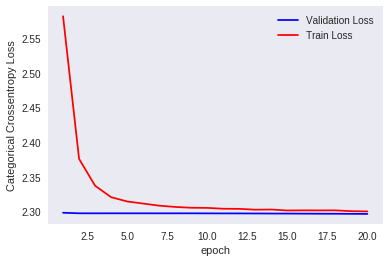

In [53]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Before test score- 1.097 Test acc- 0.633 Acc- 0.6412 val acc- 0.663
After test score- 2.296 Test acc- 0.113 ACC0.1149 Val acc- 0.113

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


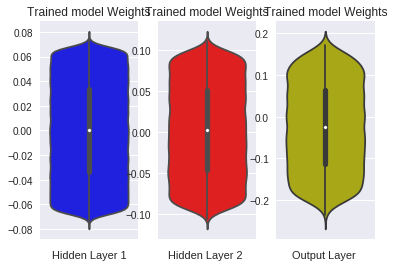

In [54]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + Sigmoid activation + ADAM

In [55]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(256, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(64, activation='sigmoid'))
model_sigmoid.add(Dense(512, activation='sigmoid'))
model_sigmoid.add(Dropout(0.25))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_39 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_40 (Dense)             (None, 512)               33280     
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                5130      
Total params: 255,818
Trainable params: 255,818
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.7917

Test score: 0.10365610038250288
Test accuracy: 0.9785


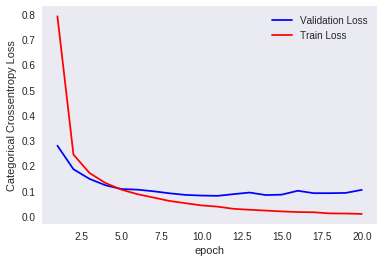

In [56]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Bfroe Test score - 0.098 Test acc- 0.979 Acc- 0.9974 Val  acc- 0.9794
After Test score- 0.103 test acc-0.9785 acc-0.9974 Val acc - 0.9785

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


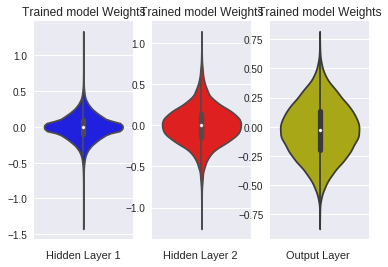

In [58]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

MLP + Batch-Norm on hidden Layers + AdamOptimizer

# **Dropout -0.80**

In [47]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(100, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_relu.add(Dropout(0.80))

model_batch.add(Dense(150, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization_11 (Batc (None, 100)               400       
_________________________________________________________________
dense_32 (Dense)             (None, 68)                6868      
_________________________________________________________________
batch_normalization_12 (Batc (None, 68)                272       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                690       
Total params: 86,730
Trainable params: 86,394
Non-trainable params: 336
_________________________________________________________________


In [59]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.0138 - acc: 0.9955 - val_loss: 0.1171 - val_acc: 0.9717
Epoch 2/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.0107 - acc: 0.9967 - val_loss: 0.1219 - val_acc: 0.9697
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0108 - acc: 0.9967 - val_loss: 0.1208 - val_acc: 0.9720
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0104 - acc: 0.9967 - val_loss: 0.1159 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0102 - acc: 0.9966 - val_loss: 0.1183 - val_acc: 0.9725
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.0100 - acc: 0.9969 - val_loss: 0.1178 - val_acc: 0.9716
Epoch 7/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0093 - acc: 0.9970 - val_loss: 0.1091 - val_ac

Before deopout CC- 0.9957  Val acc 0.9735
After dropout 0.65  Acc-0.9963 Val acc-0.9720
After dropout 0

Test score: 0.13710546417972155
Test accuracy: 0.9726


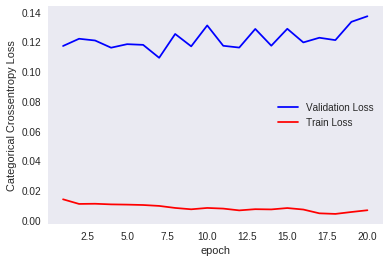

In [60]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


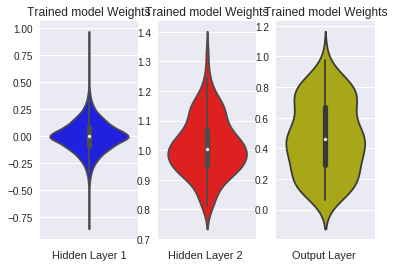

In [61]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **Dropout - 0.20**

In [62]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(100, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_relu.add(Dropout(0.20))

model_batch.add(Dense(150, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization_13 (Batc (None, 100)               400       
_________________________________________________________________
dense_43 (Dense)             (None, 150)               15150     
_________________________________________________________________
batch_normalization_14 (Batc (None, 150)               600       
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1510      
Total params: 96,160
Trainable params: 95,660
Non-trainable params: 500
_________________________________________________________________


In [63]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.3072 - acc: 0.9088 - val_loss: 0.1943 - val_acc: 0.9424
Epoch 2/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1576 - acc: 0.9536 - val_loss: 0.1532 - val_acc: 0.9538
Epoch 3/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.1168 - acc: 0.9659 - val_loss: 0.1280 - val_acc: 0.9638
Epoch 4/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0904 - acc: 0.9738 - val_loss: 0.1118 - val_acc: 0.9674
Epoch 5/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0734 - acc: 0.9785 - val_loss: 0.1131 - val_acc: 0.9666
Epoch 6/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0573 - acc: 0.9834 - val_loss: 0.1004 - val_acc: 0.9703
Epoch 7/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0477 - acc: 0.9862 - val_loss: 0.0999 - val_ac

 MLP + Dropout + AdamOptimizer

Dropout-0.65, 0.25

In [75]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(64, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.65))

model_drop.add(Dense(28, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.25))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_15 (Batc (None, 64)                256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 28)                1820      
_________________________________________________________________
batch_normalization_16 (Batc (None, 28)                112       
_________________________________________________________________
dropout_12 (Dropout)         (None, 28)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)                290       
Total para

In [76]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.9806 - acc: 0.6891 - val_loss: 0.3695 - val_acc: 0.8949
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.6467 - acc: 0.7980 - val_loss: 0.3282 - val_acc: 0.9046
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.5781 - acc: 0.8208 - val_loss: 0.2933 - val_acc: 0.9150
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.5403 - acc: 0.8339 - val_loss: 0.2870 - val_acc: 0.9150
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.5085 - acc: 0.8451 - val_loss: 0.2846 - val_acc: 0.9194
Epoch 6/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.4888 - acc: 0.8524 - val_loss: 0.2688 - val_acc: 0.9235
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.4730 - acc: 0.8573 - val_loss: 0.2646 - val_ac

Test score: 0.20806283577531576
Test accuracy: 0.9397


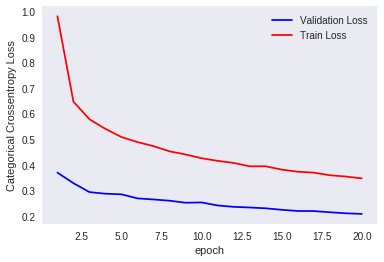

In [77]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


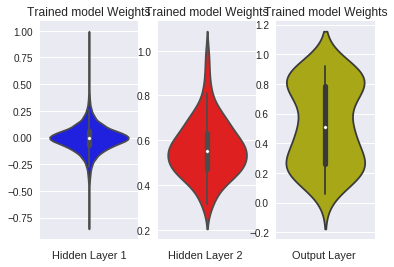

In [78]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

Dropout-0.55

In [79]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(256, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.55))

model_drop.add(Dense(54, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
#model_drop.add(Dropout(0.25))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_17 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 54)                13878     
_________________________________________________________________
batch_normalization_18 (Batc (None, 54)                216       
_________________________________________________________________
dense_60 (Dense)             (None, 10)                550       
Total params: 216,628
Trainable params: 216,008
Non-trainable params: 620
_________________________________________________________________


In [80]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.5254 - acc: 0.8391 - val_loss: 0.2798 - val_acc: 0.9199
Epoch 2/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.3456 - acc: 0.8966 - val_loss: 0.2400 - val_acc: 0.9297
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.3103 - acc: 0.9065 - val_loss: 0.2132 - val_acc: 0.9368
Epoch 4/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.2857 - acc: 0.9156 - val_loss: 0.2054 - val_acc: 0.9394
Epoch 5/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.2683 - acc: 0.9187 - val_loss: 0.1931 - val_acc: 0.9438
Epoch 6/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2546 - acc: 0.9239 - val_loss: 0.1872 - val_acc: 0.9481
Epoch 7/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.2434 - acc: 0.9277 - val_loss: 0.1755 - 

MLP + ReLU + ADAM

In [64]:
model_relu = Sequential()
model_relu.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(840, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
#model_relu.add(Dropout(0.95))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_46 (Dense)             (None, 840)               861000    
_________________________________________________________________
dense_47 (Dense)             (None, 10)                8410      
Total params: 1,673,250
Trainable params: 1,673,250
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 414us/step - loss: 0.2029 - acc: 0.9397 - val_loss: 0.1106 - val_acc: 0.9659
Epoch 2/20
60000/60000 [==============================] - 23s 386us/step - loss: 0.0708 - acc: 0.9779 - val_loss: 0.0713 - val_acc: 0.9786
Epoch 3/20
60000/60000 [==============================] - 24s 3

0.98
Value CCURcy reduced to 0.97

Test score: 0.09703917925084593
Test accuracy: 0.9833


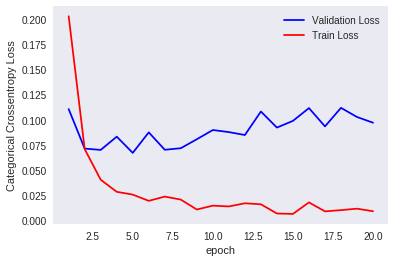

In [65]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


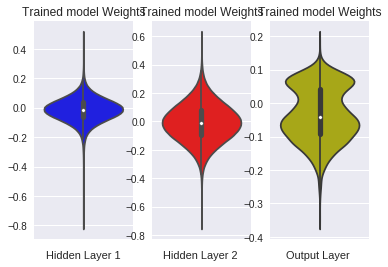

In [73]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **Dropout- 0.95**

In [83]:
model_relu2 = Sequential()
model_relu2.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu2.add(Dense(840, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu2.add(Dropout(0.95))
model_relu2.add(Dense(output_dim, activation='softmax'))

print(model_relu2.summary())

model_relu2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_62 (Dense)             (None, 840)               861000    
_________________________________________________________________
dropout_14 (Dropout)         (None, 840)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 10)                8410      
Total params: 1,673,250
Trainable params: 1,673,250
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 30s 499us/step - loss: 1.1736 - acc: 0.6764 - val_loss: 0.2342 - val_acc: 0.9305
Epoch 2/20
60000/60000 [==============================] - 27s 447us/st

Test score: 0.12255072885947511
Test accuracy: 0.978


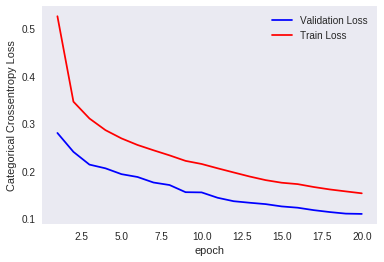

In [81]:
score = model_relu2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


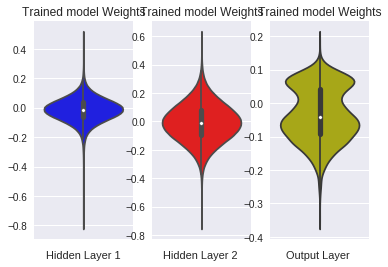

In [82]:
w_after = model_relu2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [74]:
#pretty table Before dropout

from prettytable import PrettyTable
    
p = PrettyTable()

p.field_names = ["Model before dropout", "Accuracy",  ]

p.add_row(["SGD", 0.90, ] )
p.add_row(["MLP + Sigmoid activation + SGDOptimizer", 0.65, ] )
p.add_row(["MLP + Sigmoid activation + ADAM", 0.97, ] )
p.add_row(["MLP + Batch-Norm on hidden Layers + AdamOptimizer", 0.97, ] )
p.add_row(["MLP + Dropout + AdamOptimizer", 0.94, ] )


print(p)

+---------------------------------------------------+----------+
|                       Model                       | Accuracy |
+---------------------------------------------------+----------+
|                        SGD                        |   0.9    |
|      MLP + Sigmoid activation + SGDOptimizer      |   0.65   |
|          MLP + Sigmoid activation + ADAM          |   0.97   |
| MLP + Batch-Norm on hidden Layers + AdamOptimizer |   0.97   |
|           MLP + Dropout + AdamOptimizer           |   0.94   |
+---------------------------------------------------+----------+


# **Conclusion**


Based on applying different dropout rate with different combinations, we can observe

* 
The model becomes more robust and faster
* More number of epochs might increase accuracy

1.   Loss is minimised as overfitting is reduced
2.  Accuracy and loss varies with different dropout rate.



*  More dense layered model takes takes longer time.
*   Less dropout rate reduce accuracy, more the ignoring of conjoint points more accuracy is seen.














